In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\ML\clustering.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
df = df.drop("Loan_ID",axis = 1)
df.isnull().sum()


Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.Gender.mode()

0    Male
dtype: object

In [5]:
df.Gender= df.Gender.fillna("Male")

In [6]:
df.Dependents.mode()

0    0
dtype: object

In [7]:
df.Dependents = df.Dependents.fillna("0")

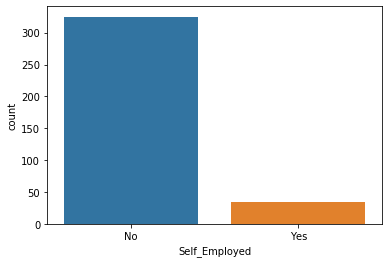

In [8]:
sn.countplot(df.Self_Employed)

In [9]:
df.Self_Employed = df.Self_Employed.fillna(method="ffill")

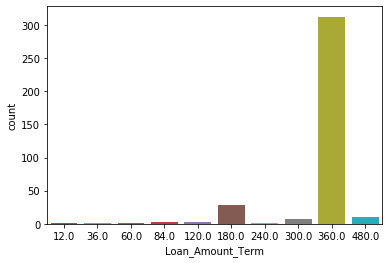

In [10]:
sn.countplot(df.Loan_Amount_Term)

In [11]:
df.Loan_Amount_Term.mode()

0    360.0
dtype: float64

In [12]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(method = 'ffill')

In [13]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.Credit_History = df.Credit_History.fillna(method = "ffill")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
Gender               381 non-null object
Married              381 non-null object
Dependents           381 non-null object
Education            381 non-null object
Self_Employed        381 non-null object
ApplicantIncome      381 non-null int64
CoapplicantIncome    381 non-null float64
LoanAmount           381 non-null float64
Loan_Amount_Term     381 non-null float64
Credit_History       381 non-null float64
Property_Area        381 non-null object
Loan_Status          381 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [16]:
label = LabelEncoder()

df.Gender = label.fit_transform(df.Gender)

df.Married  = label.fit_transform(df.Married)

df.Dependents = label.fit_transform(df.Dependents )

df.Education = label.fit_transform(df.Education)

df.Self_Employed = label.fit_transform(df.Self_Employed)

df.Property_Area = label.fit_transform(df.Property_Area)


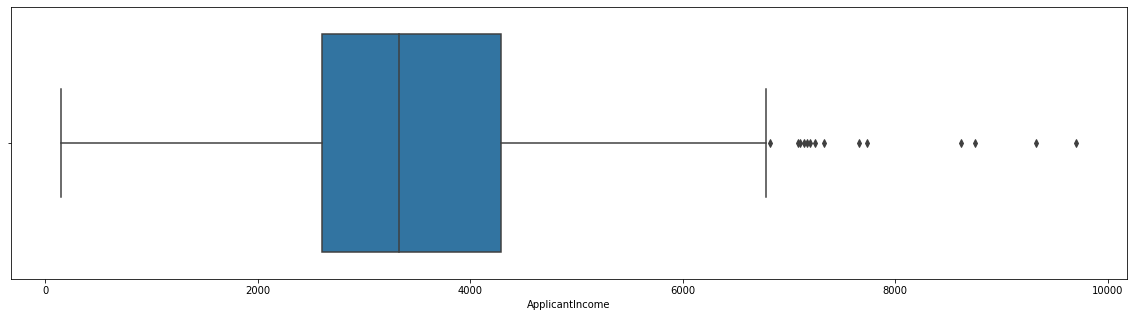

In [17]:
plt.figure(figsize=(20,5)) # this is used to detect the outliers in datasets
sn.boxplot(x = df["ApplicantIncome"])


In [18]:
corr = df.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.358371,0.221578,0.113260,-0.004182,0.034817,0.108013,0.054512,-0.117043,0.023916,0.003741
Married,0.358371,1.000000,0.390832,0.040532,0.001022,-0.043796,0.081431,0.142164,-0.135164,0.021958,0.034601
Dependents,0.221578,0.390832,1.000000,0.115834,0.052207,0.143238,-0.067536,0.087036,-0.105004,-0.009675,0.022785
Education,0.113260,0.040532,0.115834,1.000000,0.031469,-0.035147,-0.042834,-0.011820,-0.108612,0.007910,-0.086582
Self_Employed,-0.004182,0.001022,0.052207,0.031469,1.000000,0.226549,-0.065167,0.026137,-0.060372,0.039740,-0.033116
ApplicantIncome,0.034817,-0.043796,0.143238,-0.035147,0.226549,1.000000,-0.248693,0.270681,-0.099317,0.016171,-0.064762
CoapplicantIncome,0.108013,0.081431,-0.067536,-0.042834,-0.065167,-0.248693,1.000000,0.114936,-0.002695,0.006215,0.010931
LoanAmount,0.054512,0.142164,0.087036,-0.011820,0.026137,0.270681,0.114936,1.000000,0.120471,-0.017893,-0.165424
Loan_Amount_Term,-0.117043,-0.135164,-0.105004,-0.108612,-0.060372,-0.099317,-0.002695,0.120471,1.000000,-0.032716,-0.090165
Credit_History,0.023916,0.021958,-0.009675,0.007910,0.039740,0.016171,0.006215,-0.017893,-0.032716,1.000000,0.047824


In [19]:
x = df.drop("Loan_Status",axis=1)
y = df.Loan_Status


In [20]:
scaler = StandardScaler()
scaled=scaler.fit_transform(x)
scaled

array([[ 0.53587514,  0.81917802,  0.33794768, ...,  0.27618725,
         0.43660623, -1.35183217],
       [ 0.53587514,  0.81917802, -0.67589536, ...,  0.27618725,
         0.43660623,  1.21698607],
       [ 0.53587514,  0.81917802, -0.67589536, ...,  0.27618725,
         0.43660623,  1.21698607],
       ...,
       [-1.86610636, -1.22073588, -0.67589536, ...,  0.27618725,
         0.43660623, -1.35183217],
       [ 0.53587514,  0.81917802,  2.36563375, ..., -2.35449629,
         0.43660623, -1.35183217],
       [-1.86610636, -1.22073588, -0.67589536, ...,  0.27618725,
        -2.29039334, -0.06742305]])

In [21]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state = 0)

In [22]:
Accuracy=[]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    yp = knn.predict(x_test)
    Accuracy.append(accuracy_score(y_test,yp))
    

In [23]:
Accuracy

[0.5584415584415584,
 0.5714285714285714,
 0.6753246753246753,
 0.6493506493506493,
 0.7012987012987013,
 0.6103896103896104,
 0.6623376623376623,
 0.6753246753246753,
 0.7142857142857143,
 0.7012987012987013,
 0.6753246753246753,
 0.6753246753246753,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.7012987012987013,
 0.6883116883116883,
 0.7012987012987013,
 0.7012987012987013]

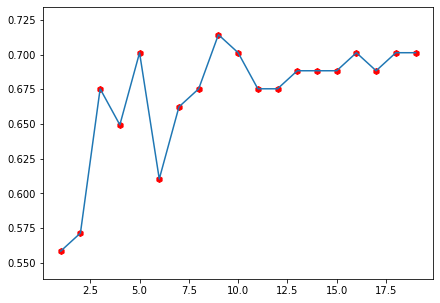

In [24]:
plt.figure(figsize = (7,5))
plt.scatter(range(1,20),Accuracy, marker = "h", color = "r")
plt.plot(range(1,20),Accuracy)

In [25]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [26]:
print(accuracy_score(y_test,yp))

0.7012987012987013
